In [7]:
#mean value and variance calculation from experimental value
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%cd D:Experimental_Data

D:\Experimental_Data


In [3]:
single = pd.read_csv (r'weight1ch.csv', header=None)

In [4]:
single

,0,1
0,-1.211377e-09,-0.001953
1,3.886230e-10,-0.000977
2,1.988623e-09,-0.000977
3,3.588623e-09,0.000977
4,5.188623e-09,0.000977
5,6.788623e-09,0.000977
6,8.388623e-09,-0.001953
7,9.988623e-09,-0.001953
8,1.158862e-08,-0.001953
9,1.318862e-08,0.000000


In [5]:
s_rf = list(single[1])

In [8]:
np.save('weight1ch.npy', s_rf)  

In [9]:
len_rf=len(s_rf)    #Sample Space
len_pulse=625    #Space of single pulse
N=len_rf/len_pulse

In [10]:
def variance(data):
    n = len(data)
    mean = sum(data) / n
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / n
    return variance
def sum_data(data):
    temp = [0]*int(N)
    for n in range(int(N)):
        for i in range(len_pulse):
            temp1=len_pulse*(n)+i
            temp[n]+=data[temp1]
    return(temp)

In [13]:
def weight(data,sum_val):
    temp = [0]*len_pulse
    for i in range(len_pulse):
        for n in range(int(N)):
            temp1 =len_pulse*(n)+i
            temp[i]+=data[temp1]/sum_val[n]
        temp[i] = temp[i]/N
    return(temp)
def weight_data(data):
    temp = [0]*int(N)
    for n in range(int(N)):
        for i in range(len_pulse):
            temp1 = len_pulse*(n)+i
            temp[n]+=data[temp1]*weights[i]
    return(temp)

In [15]:
sum_n=sum_data(s_rf)


In [16]:
weights=weight(s_rf,sum_n)

In [17]:
np.save('weights_from_weight1ch.npy', weights)  

In [18]:
file = [0,5,10,15,20,25,30,35,40,45,50]

In [23]:
%cd D:\Download

D:\Download


In [25]:
Var = [0]*len(file)
for i in range(len(file)):
    print(i)
    data1 = pd.read_csv (str(file[i])+'uw.csv', header=None)
    b_rf = list(data1[1])
    q = weight_data(b_rf)
    np.save(str(file[i])+'uw_weited.npy', q)  
    var = variance(q)       
    Var[i] = var
    print(sum(q)/len(q))
    print(var)

0
-0.0016111588339487312
1.0780685137775657e-07
1
-4.548564788637514e-05
1.2511746265428073e-07
2
0.00015156168806476834
1.3789674693239522e-07
3
-0.001352190385108883
1.5086721238023142e-07
4
-0.0006374988658526245
1.7274786345432546e-07
5
0.0008034045974265724
2.0245895219717793e-07
6
-0.008976203272568662
2.1457403095460563e-07
7
-0.0009747158660646025
2.343630763328171e-07
8
-0.0022559165339876776
2.4363733527129343e-07
9
-0.007738229113872869
2.519165286193374e-07


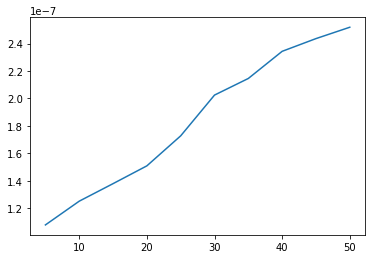

In [26]:
plt.plot(file,Var)

In [27]:
data1 = pd.read_csv ('0uw.csv', header=None)
b_rf = list(data1[1])
q0 = weight_data(b_rf)
np.save('0uw_weited.npy', q0)  